In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-02-03 08:37:31--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.8’

insurance.csv.8     100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-02-03 08:37:31 (102 MB/s) - ‘insurance.csv.8’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
labels = dataset.pop("expenses")

In [ ]:
dataset["sex"] = pd.Categorical(dataset.sex, categories=["female", "male"]).codes

In [ ]:
dataset["smoker"] = pd.Categorical(dataset.smoker, categories=["no", "yes"]).codes

In [ ]:
dataset[["north", "east"]] = dataset.region.str.extract("(?P<north>south|north)(?P<east>west|east)")
dataset.drop(columns="region", inplace=True)

In [ ]:
dataset["north"] = pd.Categorical(dataset.north, categories=["south", "north"]).codes
dataset["east"] = pd.Categorical(dataset.east, categories=["west", "east"]).codes

In [ ]:
dataset.head(3)

,age,sex,bmi,children,smoker,north,east
0,19,0,27.9,0,1,0,0
1,18,1,33.8,1,0,0,1
2,28,1,33.0,3,0,0,1


In [ ]:
min_max = MinMaxScaler()
dataset = min_max.fit_transform(dataset)
# labels = min_max.fit_transform(labels.to_frame())

In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.2)

In [ ]:
model = keras.Sequential([
    layers.Dense(units=1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=20),
              loss="mean_absolute_error",
              metrics=["mae", "mse"])

In [ ]:
# model.summary()

In [ ]:
model.fit(train_dataset, train_labels, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 12053.3770 - mae: 12053.3770 - mse: 287883232.0000
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 9911.6953 - mae: 9911.6953 - mse: 227909584.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8593.4609 - mae: 8593.4609 - mse: 186970544.0000
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 7888.3076 - mae: 7888.3076 - mse: 161621632.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7515.5610 - mae: 7515.5610 - mse: 145621440.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7251.2402 - mae: 7251.2402 - mse: 133649200.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7042.2520 - mae: 7042.2520 - mse: 125346744.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6849.9829 - mae: 6849.9829 - mse: 119252992.0000
Epoch 9/100
34/34 [===

9/9 - 0s - loss: 3365.1672 - mae: 3365.1672 - mse: 38383280.0000 - 142ms/epoch - 16ms/step
Testing set Mean Abs Error: 3365.17 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


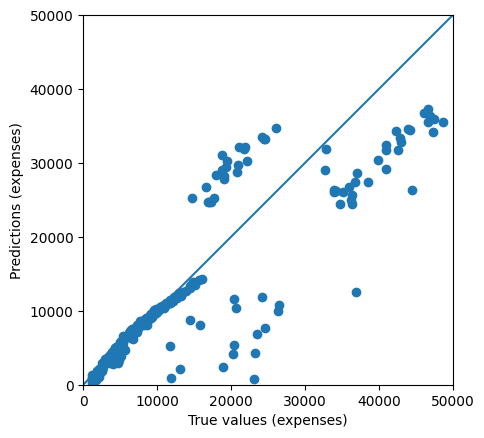

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
